In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


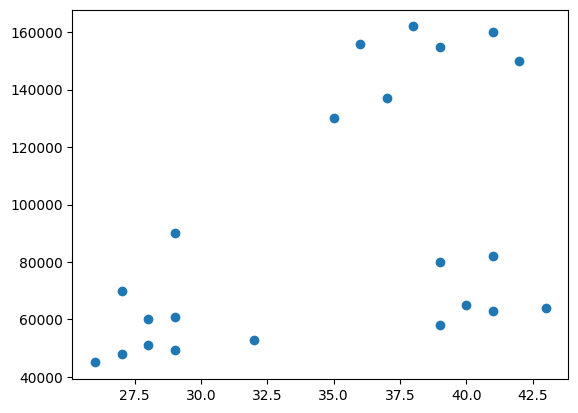

In [3]:
plt.scatter(df['Age'], df['Income($)'])

In [4]:
km = KMeans(n_clusters=3)

In [8]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [9]:
df['cluster'] = y_predicted

C:\Users\roben\AppData\Local\Temp\ipykernel_8676\2139694466.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


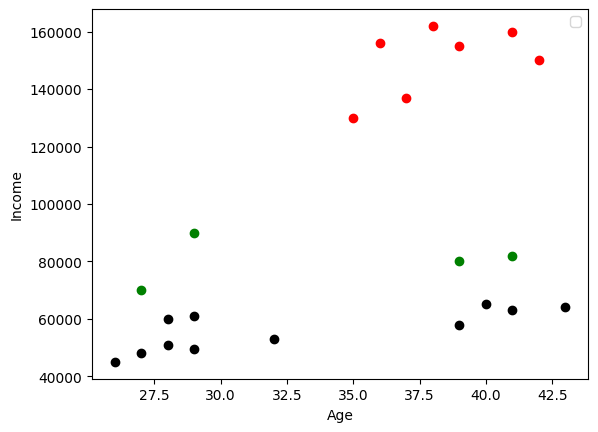

In [10]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='black')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [16]:
scalar = MinMaxScaler()
scalar.fit(df[['Income($)']])
df['Income($)'] = scalar.transform(df[['Income($)']])

scalar.fit(df[['Age']])
df['Age'] = scalar.transform(df[['Age']])

In [22]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [19]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [20]:
df['cluster'] = y_predicted

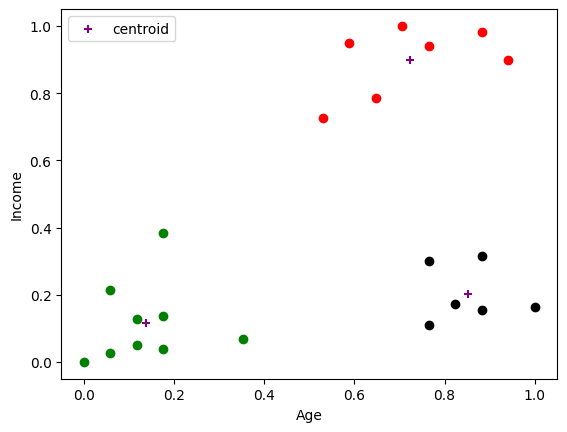

In [24]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='black')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker="+", label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [23]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [25]:
k_rng = range(1,10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [26]:
sse

[5.434011511988177,
 2.0911363886990766,
 0.4750783498553095,
 0.40284770257339986,
 0.2664030124668415,
 0.24438989606232972,
 0.1729962193245546,
 0.14682060617795395,
 0.12936161457144518]

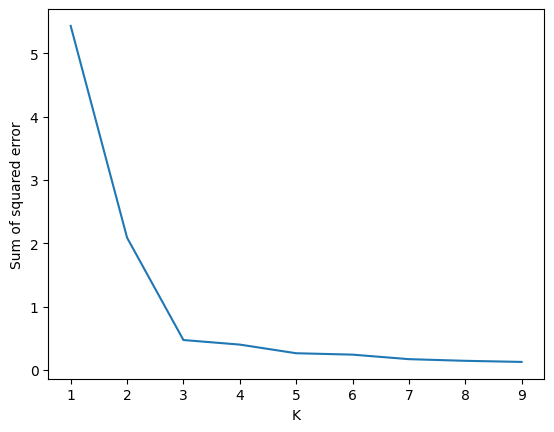

In [28]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)